# 1. App Review NLP work

This question uses the Apple App review dataset that you generated in the "Pulling online data" workshop. Your dataset should have at least 3-5 different applications, with data from a few countries.

**1.1** Using the bag-of-words or TF-IDF vector model (from SKLearn), cluster the reviews into 5 clusters. Measure the accuracy of the cluster overlap against the real review scores.

**1.2** Now use a sentence embedding using on of the `gensim` pre-trained word embedding models to achieve the same in clustering. Get the best classification accuracy score you can on the 5-star review scale targer using all unsupervised methods you want.

**1.3** Using any method you want (pre-trained models, dimensionality reduction, feature engineering, etc.) make the best **regression** model you can to predict the 5 star rating. Rate the accuracy in regression terms (mean squared error) and in classification terms (accuracy score, etc.)

**1.4** Do the same as in 1.3, but use a classification model. Are classification models better or worse to predict a 5-point rating scale? Explain in a few paragraphs and justify with metrics.


1.TF-TDIF

In [184]:
#Load packages
import json
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [5]:
req = requests.get('https://itunes.apple.com/gb/rss/customerreviews/id=id553834731/page=2/sortby=mostrecent/json')
data = req.json().get('feed')
data

{'author': {'name': {'label': 'iTunes Store'},
  'uri': {'label': 'http://www.apple.com/uk/itunes/'}},
 'icon': {'label': 'http://itunes.apple.com/favicon.ico'},
 'id': {'label': 'https://mzstoreservices-int-st.itunes.apple.com/gb/rss/customerreviews/id=id553834731/page=2/sortby=mostrecent/json'},
 'link': [{'attributes': {'href': 'https://music.apple.com/WebObjects/MZStore.woa/wa/viewGrouping?cc=gb&id=130',
    'rel': 'alternate',
    'type': 'text/html'}},
  {'attributes': {'href': 'https://mzstoreservices-int-st.itunes.apple.com/gb/rss/customerreviews/id=id553834731/page=2/sortby=mostrecent/json',
    'rel': 'self'}},
  {'attributes': {'href': '', 'rel': 'first'}},
  {'attributes': {'href': '', 'rel': 'last'}},
  {'attributes': {'href': '', 'rel': 'previous'}},
  {'attributes': {'href': '', 'rel': 'next'}}],
 'rights': {'label': 'Copyright 2008 Apple Inc.'},
 'title': {'label': 'iTunes Store: Customer Reviews'},
 'updated': {'label': '2021-05-25T11:36:47-07:00'}}

In [16]:
#apps: calm, headspace, ten percent happier

list_countries = ['ca','gb', 'us']
list_app = ['571800810','493145008', '992210239']


def get_country_reviews(
    appID,
    country='us',
    page=1,
    df = pd.DataFrame()):
    url = 'https://itunes.apple.com/' + country \
          + '/rss/customerreviews/id=%s/page=%d/sortby=mostrecent/json' \
          % (appID, page)
    req = requests.get(url)
    try:
      data = req.json().get('feed')
      page_error = False
    except ValueError:
      return df.reset_index(drop=True)
    try:
      df_index = np.arange(len(data.get('entry')))
    except:
      return df.reset_index(drop=True)
    
    csvTitles = ['title', 'version', 'rating', 'review', 'vote_count']
    page_df = pd.DataFrame(index=df_index, columns=csvTitles)
    entry_index = -1  # DataFrame Index
    
    for entry in data.get('entry'):
      if entry.get('im:name'):
          continue
      entry_index += 1
      page_df.title.loc[entry_index] = entry.get('title').get('label')
      page_df.version.loc[entry_index] = entry.get('im:version').get('label')
      page_df.rating.loc[entry_index] = entry.get('im:rating').get('label')
      page_df.review.loc[entry_index] = entry.get('content').get('label')
      page_df.vote_count.loc[entry_index] = entry.get('im:voteCount').get('label')
  
  # Clean up returned values
      page_df.dropna(axis=0, how='all', inplace=True)
      page_df.fillna({'title' : '', 'review' : '', 'version': ''})
      page_df.rating = pd.to_numeric(page_df.rating, 
                                  downcast='unsigned', 
                                  errors='coerce')
      page_df.vote_count = pd.to_numeric(page_df.vote_count, 
                                      downcast='unsigned', 
                                      errors='coerce')
  
    if not page_error:
      return get_country_reviews(
          appID,
          country=country,
          page=page + 1,
          df=df.append(page_df).reset_index(drop=True))

def get_reviews(
    appID,
    list_countries=list(['au','ca','gb','ie','nz','us'])):
  
    if type(list_countries) == str:
      list_countries = [list_countries]
  
    df = pd.DataFrame()

    for country in list_countries:
        df=df.append(
            get_country_reviews(appID, country=country)
            ).reset_index(drop=True)
    return df



In [39]:
df1 = get_reviews(571800810)#i'm using the meditation app 'calm' here
df1['app_name'] = 'calm'
df1

,title,version,rating,review,vote_count,app_name
0,Nisha,5.18,5,I love this app thank you,0,calm
1,Far too expensive for what it is,5.14.1,1,Literally can’t use any part of the app withou...,1,calm
2,LifeSaver,5.10.2,5,Calm literally saved my life. Never before had...,0,calm
3,Yay,5.9,5,Yay,0,calm
4,Very mindful,5.5,5,"I love this app, it provides me a brief daily ...",0,calm
5,Sleep with ppl talking?,5.3,1,Wow! Not able to sleep at all with people talk...,0,calm
6,Complete rip off,4.29,1,"Don’t pay money on this app, complete rip off....",1,calm
7,So expensive,4.27,1,Why don’t they just make you pay for the app i...,0,calm
8,Only but if willing to pay subscription,4.25,3,When I bought this app it seemed really good a...,0,calm
9,AMAZING,4.22,5,I use this app when I’m feeling particularly a...,0,calm


In [23]:
df2 = get_reviews(493145008)#this is for the headspace app
df2['app_name'] = 'headspace'
df2

,title,version,rating,review,vote_count,app_name
0,I’m alive but I’m dead,3.164.0,3,This app helps me a lot I haven’t gotten much ...,0,headspace
1,Just downloaded Headspace App.,3.158.0,5,"Finding it very useful already,thank you!",0,headspace
2,Great app but don’t trick me with the cost!,3.151.0,4,Loving the app but you need to show the cost i...,0,headspace
3,My nightly ritual,3.146.0,5,I absolutely love Headspace. It has helped and...,0,headspace
4,Not free,3.139.0,2,Subscription required.,0,headspace
5,Love this app - could love it even more,3.121.0,5,Okay so I LOVE this app. as many other reviews...,0,headspace
6,Helped me clear up,3.109.0,5,Recently I’m not doing well in school after se...,0,headspace
7,Anxiety reducer,3.103.0,5,Could not keep my anxiety under wraps without ...,0,headspace
8,Georgia Lewis,3.94.0,5,"Hey I love fun times peace of mind , having a ...",0,headspace
9,Good,3.87.0,5,This has helped me settle my anxiety down,0,headspace


In [24]:
df3 = get_reviews(992210239)#this is for the ten percent happier app
df3['app_name'] = 'ten_percent_happpier'
df3

,title,version,rating,review,vote_count,app_name
0,Great resource for staying calm,5.18.1,5,I’ve been using this for more than 2 years and...,0,ten_percent_happpier
1,One of my most powerful tools,4.16.1,5,This is a great app with a huge range of pract...,1,ten_percent_happpier
2,Do yourself a favour and give it a try!,4.1.10,5,Great instructional videos and guided meditati...,0,ten_percent_happpier
3,Simple yet also comprehensive,5.18.4,5,Super simple to use UI mixed in with a friendl...,0,ten_percent_happpier
4,Life Changing,5.11.3,5,After try several meditation apps I can confid...,0,ten_percent_happpier
5,Mindfulness for cynics,5.1.2,5,I enjoyed Dan Harris’s book which preceded thi...,0,ten_percent_happpier
6,Great App,4.3.1,5,This is a great body of information and practi...,0,ten_percent_happpier
7,Great App,4.0.5,5,This is a good one. Give it a try!,0,ten_percent_happpier
8,Mindfulness,5.18.3,4,👌🏿,0,ten_percent_happpier
9,The curates egg,5.3.6,3,This app and the lessons / meditations therein...,0,ten_percent_happpier


In [31]:
#combine data for all 3 apps
meditation = pd.concat([df1,df2,df3], axis=0)
meditation.head(100)

,title,version,rating,review,vote_count,app_name
0,Nisha,5.18,5,I love this app thank you,0,calm
1,Far too expensive for what it is,5.14.1,1,Literally can’t use any part of the app withou...,1,calm
2,LifeSaver,5.10.2,5,Calm literally saved my life. Never before had...,0,calm
3,Yay,5.9,5,Yay,0,calm
4,Very mindful,5.5,5,"I love this app, it provides me a brief daily ...",0,calm
...,...,...,...,...,...,...
42,Amazing,3.5.0,4,"This was my first time meditating, and I LOVED...",0,headspace
43,Worthwhile,2.12.0,5,Nice way to take a break from the loop,0,headspace
44,Excellent app,2.10.1,5,"Easy to use, professional, educational.",0,headspace
45,Slick but lite weight with a heavy pricetage,3.164.0,1,"Headspace does a lot of advertising, I have ha...",0,headspace


In [32]:
#see how many reviews this stashes
meditation.shape

(132, 6)

1.1 TFID review analysis

In [137]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import numpy as np

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer

COMPONENTS = 10
tf = text.TfidfVectorizer(stop_words='english')
X = tf.fit_transform(meditation.review)
X

<132x1022 sparse matrix of type '<class 'numpy.float64'>'
	with 2132 stored elements in Compressed Sparse Row format>

In [180]:
from sklearn.decomposition import PCA
import statsmodels.api as sm

pca = PCA(n_components=10)
X = pca.fit(X.todense().T).components_.T
X = sm.add_constant(X)
X

array([[ 1.00000000e+00,  1.93852355e-01, -2.67797332e-01, ...,
         1.60442833e-01, -1.74568299e-01,  3.24574239e-02],
       [ 1.00000000e+00,  1.11785716e-01,  1.34514688e-01, ...,
         7.55247448e-02,  3.56549172e-02,  7.23707250e-02],
       [ 1.00000000e+00,  3.39757428e-02, -2.86972385e-02, ...,
         2.60368935e-02, -1.79691019e-01,  7.44090637e-02],
       ...,
       [ 1.00000000e+00,  6.34188442e-02,  4.93042602e-02, ...,
        -1.01294185e-01, -5.45415551e-02, -1.02927160e-01],
       [ 1.00000000e+00,  6.60435658e-03, -7.52529805e-03, ...,
        -2.56426622e-04,  4.80557319e-02, -4.18861392e-02],
       [ 1.00000000e+00,  4.32907717e-02, -4.02093507e-02, ...,
        -1.33800278e-02, -6.28887734e-03,  9.43742198e-03]])

In [181]:
sm.OLS(meditation.rating.values, X).fit().summary()
#not a great R-squared, but my previous attempts gave a result of 17

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     6.072
Date:                Tue, 25 May 2021   Prob (F-statistic):           1.93e-07
Time:                        22:21:03   Log-Likelihood:                -208.01
No. Observations:                 132   AIC:                             438.0
Df Residuals:                     121   BIC:                             469.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0949      0.190     21.581      0.000       3.719       4.471
x1            -0.2794      2.109     -0.132      0.895      -4.454       3.896
x2            -7.5100      1.225     -6.133      0.000      -9.934      -5.086
x3             4.1473      1.222      3.393      0.001       1.728       6.567
x4             0.9874      1.226      0.806      0.422      -1.439       3.414
x5            -1.3425      1.228     -1.093      0.277      -3.774       1.089
x6             0.4870      1.237      0.394      0.694      -1.962       2.936
x7             3.4344      1.223      2.808      0.006       1.013       5.856
x8            -0.5873      1.263     -0.465      0.643      -3.088       1.914
x9            -0.2030      1.262     -0.161      0.872      -2.701       2.295
x10           -1.3491      1.234     -1.093      0.277      -3.793       1.095
==============================================================================
Omnibus:                       22.657   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.036
Skew:                          -1.057   Prob(JB):                     8.17e-07
Kurtosis:                       3.792   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1.2 Sentence embedding

In [182]:
from sklearn.cluster import KMeans

kmc = KMeans(n_clusters=5)
kmc.fit(X)
kmc.predict(X)

array([3, 4, 1, 1, 3, 1, 4, 4, 1, 1, 1, 1, 1, 3, 2, 0, 4, 1, 1, 2, 1, 1,
       1, 4, 2, 2, 1, 1, 1, 4, 4, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 3, 1, 2, 0, 1, 2, 0, 2, 2, 4, 1, 2,
       2, 1, 2, 1, 4, 2, 1, 4, 4, 1, 2, 1, 1, 2, 1, 0, 2, 2, 2, 2, 4, 1,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1],
      dtype=int32)

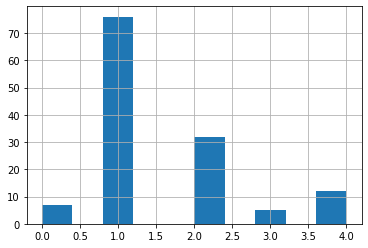

In [183]:
#check ratings distribution
import pandas as pd

pd.Series(kmc.predict(X)).hist()

In [185]:
#test for fowlkes-mallow
import pandas as pd
from sklearn.metrics import fowlkes_mallows_score

fowlkes_mallows_score(meditation.rating, kmc.predict(X))
#based on scikit learn doc, this is in the middle between homogeneous and random.
#with rather few reviews (134), this is OK

0.4824432020482221

In [186]:
#word embeddings with gensim

import gensim.downloader as model_api

word_vectors = model_api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [193]:
import re

replaceDict = dict({
'{':" ", '}':" ", ',':"", '.':" ", '!':" ", '\\':" ", '/':" ", '$':" ", '%':" ",
'^':" ", '?':" ", '\'':" ", '"':" ", '(':" ", ')':" ", '*':" ", '+':" ", '-':" ",
'=':" ", ':':" ", ';':" ", ']':" ", '[':" ", '`':" ", '~':" ",
})

rep = dict((re.escape(k), v) for k, v in replaceDict.items())
pattern = re.compile("|".join(rep.keys()))
def replacer(text):
    return rep[re.escape(text.group(0))]

In [200]:
words = meditation.review.str.replace(pattern, replacer).str.lower().str.split()
words = pd.DataFrame(words.tolist())
words

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343
0,i,love,this,app,thank,you,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,literally,can’t,use,any,part,of,the,app,without,paying,and,it,is,much,too,expensive,for,what,it,is,a,collection,of,breathing,exercises,and,meditation,and,some,music,remixes,is,not,justified,by,the,price,i,don’t,pay,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,calm,literally,saved,my,life,never,before,had,my,mind,or,body,experienced,meditation,and,suddenly,life,threw,me,a,massive,curve,ball,calm,gave,me,hope,when,the,world,as,i,knew,it,disintegrated,over,2,years,ago,calm,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,yay,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,i,love,this,app,it,provides,me,a,brief,daily,meditation,and,if,i’m,having,issues,sleeping,a,sleep,story,put,me,straight,to,sleep,love,it,thank,you,❤️❤️❤️,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,many,life,lessons,in,this,app,that,i,have,used,to,improve,my,thinking,and,my,life,be,sure,you,listen,to,the,dialogues,first,as,they,are,very,accessible,and,direct,re,lessons,learned,dnd,wisdom,to,be,spoiled,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
128,i,never,thought,i,could,learn,how,to,quiet,my,anxious,mind,long,enough,to,meditate,the,fact,that,the,first,meditation,is,i,believe,around,2,minutes,made,me,feel,like,i,could,at,least,try,i’m,now,6,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
129,so,thankful,that,i,have,been,able,to,use,this,app,for,free,for,6months,as,a,healthcare,worker,it,has,been,an,invaluable,resource,in,my,life,i,have,never,run,out,of,content,it’s,fantastic,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
130,this,app,caters,for,beginners,to,advance,users,the,instructors,or,guides,are,easy,to,listen,to,and,under

In [204]:
def soft_get(w):
  try:
      return word_vectors[w]
  except KeyError:
      return np.zeros(word_vectors.vector_size)

def map_vectors(row):
    if np.sum(row.notna()) == 0:
        return np.zeros(word_vectors.vector_size)
    try:
      return np.sum(row.loc[row.notna()].apply(soft_get))
    except:
      return np.zeros(word_vectors.vector_size)

In [207]:
emb = pd.DataFrame(words.apply(map_vectors, axis=1).tolist())
emb.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.829492,1.761500,0.482163,-0.909160,3.822383,-1.492550,-2.107790,-0.547612,-0.476970,2.634948,-1.402168,3.849300,-1.766145,-1.491818,5.097580,1.541960,0.164100,1.433346,1.115425,-2.561409,-1.536890,3.068120,3.040790,2.331163,6.499160,-9.184376,-5.842540,0.561107,3.685760,-5.496341,16.915701,2.786990,-3.208210,0.772430,-1.526663,-0.982044,1.987310,0.070608,0.231468,-3.099100,1.550097,-0.179123,-2.604280,0.672899,0.735246,2.081780,-0.081476,-1.910620,0.502407,3.418310
1,37.548279,5.154378,-6.783389,-18.895890,40.231619,13.363922,-41.428795,-12.853801,-18.864607,23.120916,2.418152,23.937372,-30.525769,-23.034297,59.220507,34.144066,18.754824,7.115767,-22.130410,-57.231908,3.290458,17.753662,22.241067,-0.593384,29.503683,-177.978107,-51.932770,11.761474,40.563563,-34.063346,362.042450,18.736546,-23.920637,-29.610099,5.260749,-11.017134,12.895490,25.290585,2.334560,-25.563505,-12.225015,13.645937,-0.406429,28.142062,-6.666102,8.031211,-19.776875,0.436602,-9.390326,19.369681
2,22.380590,7.772106,-10.350202,-36.398529,54.162056,-1.570245,-28.884811,32.749233,-22.547674,17.777431,1.903059,23.077681,-45.272316,-15.016140,49.172951,22.968010,0.114462,-8.318090,-22.814566,-39.093384,-18.820974,64.600929,25.334961,-13.726982,57.167820,-155.259338,-41.928139,15.641452,50.387085,-24.683765,289.034973,36.250763,-21.670238,-26.006866,-13.328779,-5.651204,9.728517,8.626739,18.502235,-26.841200,-14.061543,3.329038,-16.719719,16.283520,-0.172931,8.299639,-13.265051,-25.593666,-8.832018,3.394190
3,-0.138020,0.822920,1.449100,-2.031600,-0.970630,-1.893900,0.766980,-0.881990,0.550140,1.321500,-0.676110,0.529310,-1.183900,-0.197400,-1.423600,0.896800,1.347900,-1.556200,1.161000,2.140600,-0.803480,-0.403890,0.994980,0.515430,-1.248000,-0.893400,-1.203400,0.785090,0.526550,-1.015500,-1.106800,1.123300,-0.427600,0.962870,1.011500,0.136400,0.563920,0.418230,-0.090986,0.966350,0.015258,2.108600,0.309790,-2.679000,0.208180,0.306560,-0.249580,-1.835000,1.011000,0.336040
4,6.557480,8.590305,-4.303851,-6.249924,11.967908,1.341445,-7.643367,-0.596188,-0.517537,6.245590,-5.711396,6.643843,-8.867642,-0.741365,17.171660,3.637248,-3.122897,0.051576,-3.702225,-10.003798,-0.780829,16.883275,9.368474,4.860320,16.636723,-40.408448,-13.930783,3.741241,15.221615,-10.500474,87.194097,6.613094,-9.214920,-2.346680,-4.386063,0.357036,6.746330,1.828397,5.980714,-6.407075,1.261089,0.048911,-4.995205,9.010563,2.242308,3.653600,2.296855,-7.471207,0.118427,8.214041


In [210]:
from sklearn.preprocessing import StandardScaler

X = emb.to_numpy()
sc = StandardScaler()
sc.fit(X.T)
X = sc.transform(X.T)
X = X.T
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.089094,0.344774,-0.006190,-0.387875,0.910142,-0.547918,-0.716698,-0.288691,-0.269311,0.584390,-0.523123,0.917526,-0.622974,-0.547717,1.259970,0.284547,-0.093445,0.254751,0.167535,-0.841141,-0.560082,0.703223,0.695725,0.501051,1.644469,-2.658036,-1.741262,0.015467,0.872662,-1.646288,4.502066,0.626100,-1.018579,0.073440,-0.557276,-0.407869,0.406721,-0.119092,-0.074963,-0.988647,0.286780,-0.187602,-0.852901,0.046135,0.063239,0.432638,-0.160814,-0.662608,-0.000636,0.799291
1,0.525315,0.002036,-0.190802,-0.386463,0.568661,0.134650,-0.750451,-0.288861,-0.385958,0.292261,-0.042164,0.305450,-0.574328,-0.453313,0.875400,0.470325,0.221733,0.033720,-0.438712,-1.005729,-0.028073,0.205560,0.278048,-0.090811,0.395366,-2.956219,-0.920129,0.108765,0.574023,-0.631473,5.767074,0.221437,-0.467631,-0.559537,0.003754,-0.259193,0.127083,0.327309,-0.043514,-0.494169,-0.278704,0.139205,-0.087791,0.373371,-0.188908,0.048507,-0.400694,-0.074173,-0.232914,0.231665
2,0.351796,0.077617,-0.262512,-0.751400,0.948287,-0.097725,-0.610379,0.546400,-0.491440,0.265402,-0.032536,0.364880,-0.917948,-0.350084,0.854649,0.362821,-0.066106,-0.224372,-0.496449,-0.801978,-0.421495,1.144209,0.407245,-0.325889,1.004700,-2.982239,-0.855182,0.225313,0.877436,-0.531531,5.356500,0.612119,-0.474972,-0.556364,-0.318415,-0.174319,0.114336,0.093657,0.279005,-0.572023,-0.332168,-0.005773,-0.382058,0.237363,-0.071500,0.087518,-0.317219,-0.548609,-0.234018,-0.004550
3,-0.132501,0.742309,1.312364,-1.856358,-0.890483,-1.731000,0.691383,-0.809788,0.493979,1.196201,-0.622361,0.475016,-1.084638,-0.186559,-1.302853,0.809567,1.220235,-1.423568,1.050087,1.941884,-0.738315,-0.374541,0.898947,0.462380,-1.142992,-0.820175,-1.102390,0.707870,0.472503,-0.931331,-1.014448,1.015766,-0.396125,0.869715,0.913987,0.117323,0.506524,0.373892,-0.089682,0.872884,0.007039,1.912753,0.275172,-2.445730,0.182669,0.272231,-0.234062,-1.677379,0.913532,0.299069
4,0.280942,0.413578,-0.427726,-0.554701,0.633956,-0.059388,-0.645619,-0.185812,-0.180681,0.260592,-0.519564,0.286577,-0.725499,-0.195285,0.973484,0.090406,-0.350672,-0.143548,-0.388472,-0.799630,-0.197860,0.954668,0.464351,0.170208,0.938581,-2.783438,-1.055853,0.097191,0.846250,-0.832036,5.542230,0.284571,-0.748158,-0.300026,-0.433090,-0.123617,0.293264,-0.027616,0.243310,-0.564955,-0.064631,-0.143722,-0.472834,0.440998,-0.000609,0.091473,0.002950,-0.634386,-0.139186,0.389028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.544038,0.174698,-0.312837,-0.566909,0.476149,-0.054536,-0.801420,-0.206656,-0.410500,0.144219,-0.051692,0.447330,-0.428596,-0.273266,0.678928,0.318031,-0.036279,-0.053514,-0.105492,-0.806001,0.000782,0.478265,0.511384,0.101831,0.755637,-2.783420,-1.061408,-0.282586,0.488095,-0.770159,5.794419,0.419716,-0.580561,-0.854021,-0.051655,-0.023397,-0.028439,0.322889,-0.157047,-0.307795,-0.353156,-0.215205,-0.023041,0.503423,-0.016689,0.055657,-0.264098,-0.127339,-0.212912,0.005138
128,0.406868,0.239710,-0.073074,-0.653212,0.863284,-0.331573,-0.784067,0.095723,-0.559034,0.108807,-0.323373,0.257333,-0.793403,-0.253823,1.015531,0.431501,0.113148,-0.091019,-0.537716,-0.896775,-0.219563,0.678216,0.537811,-0.034552,0.821425,-2.953313,-0.942644,0.119295,0.676379,-0.924543,5.436552,0.650316,-0.744765,-0.391690,-0.147400,-0.336983,0.106474,0.285284,0.268610,-0.554947,-0.388090,-0.050102,-0.219497,0.350912,0.008290,0.197103,-0.054362,-0.344983,-0.307488,0.243420
129,0.529213,-0.040116,-0.004618,-0.283663,0.579597,0.097203,-1.088275,-0.342641,0.076566,0.238791,0.047295,0.308107,-0.626682,-0.401732,0.721129,0.241522,0.119768,0.107579,-0.275112,-0.690957,-0.190087,0.418809,0.317883,-0.125843,0.409626,-2.933076,-0.795970,-0.131305,0.471477,-0.515840,5.81082

In [214]:
sm.OLS(meditation.rating.values, sm.add_constant(X)).fit().summary()
#much better than the previous model, with an Rsqr of 57%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     2.236
Date:                Wed, 26 May 2021   Prob (F-statistic):           0.000628
Time:                        00:18:36   Log-Likelihood:                -178.85
No. Observations:                 132   AIC:                             457.7
Df Residuals:                      82   BIC:                             601.8
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1503      1.145      3.624      0.001       1.872       6.429
x1            -2.5228      2.133     -1.183      0.240      -6.767       1.721
x2             0.6295      2.406      0.262      0.794      -4.157       5.416
x3            -0.7836      2.356     -0.333      0.740      -5.470       3.903
x4            -1.3443      2.471     -0.544      0.588      -6.261       3.572
x5             1.1530      2.406      0.479      0.633      -3.634       5.940
x6             1.3730      1.580      0.869      0.387      -1.770       4.516
x7             0.5400      3.129      0.173      0.863      -5.685       6.765
x8             0.8199      2.637      0.311      0.757      -4.425       6.065
x9             2.1771      1.806      1.206      0.231      -1.415       5.769
x10            2.0935      2.976      0.703      0.484      -3.827       8.014
x11           -4.1485      4.560     -0.910      0.366     -13.219       4.922
x12           -1.0219      3.412     -0.300      0.765      -7.809       5.765
x13           -5.3731      3.451     -1.557      0.123     -12.239       1.492
x14            1.7840      2.789      0.640      0.524      -3.763       7.331
x15           -1.6445      4.006     -0.410      0.683      -9.614       6.325
x16            6.0969      3.636      1.677      0.097      -1.136      13.330
x17           -3.5957      2.841     -1.265      0.209      -9.248       2.057
x18           -0.6487      3.736     -0.174      0.863      -8.080       6.783
x19           -2.9237      2.604     -1.123      0.265      -8.105       2.257
x20            2.3241      2.603      0.893      0.374      -2.854       7.502
x21           -2.4005      2.417     -0.993      0.323      -7.208       2.407
x22           -5.9312      3.611     -1.642      0.104     -13.115       1.253
x23            0.4988      2.954      0.169      0.866      -5.377       6.375
x24           -1.3887      4.394     -0.316      0.753     -10.130       7.353
x25            7.3326      3.820      1.920      0.058      -0.266      14.931
x26            2.7960      4.070      0.687      0.494      -5.301      10.893
x27            1.7657      1.272      1.388      0.169      -0.765       4.296
x28            2.8055      4.130      0.679      0.499      -5.411      11.022
x29           -5.1874      2.807     -1.848      0.068     -10.772       0.397
x30            1.4537      2.909      0.500      0.619      -4.333       7.240
x31            1.3784      1.731      0.796      0.428      -2.066       4.822
x32            1.1275      1.818      0.620      0.537      -2.488       4.743
x33           -3.2973      3.765     -0.876      0.384     -10.787       4.193
x34           -1.6612      2.160     -0.769      0.444      -5.959       2.637
x35            5.1309      4.141      1.239      0.219      -3.108      13.370
x3

In [215]:
#clustering values
kmc = KMeans(n_clusters = 5)
kmc.fit(X)
kmc.predict(X)
fowlkes_mallows_score(meditation.rating, kmc.predict(X))
#lower than the previous, but still 45%

0.44678673799868845

1.3 Regression to predict 5 stars

In [ ]:
#OLS results appear above, we'll now do logistic regression
sm.Logit(meditation.rating.values, sm.add_constant(X)).fit().summary()
#throws this error:
#ValueError: endog must be in the unit interval.
#the method is not suitable for the data distribution here.

## 2. Face data

Here let's apply manifold learning on some face data.

Use the following code:

```
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
```

To get the `faces` dataset.

Use dimensionality reduction so that the darkness of the image is sorted in the first dimension as seen in this picture:

![](isofaces.png)

Then produce a picture similar to this one with your result

In [224]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=30)

In [225]:
#check what this looks like
faces.data.shape

(2370, 2914)

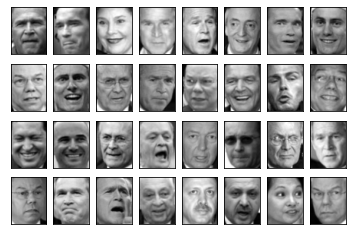

In [226]:
#visualize a few images
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

In [232]:
from sklearn.decomposition import PCA as RandomizedPCA

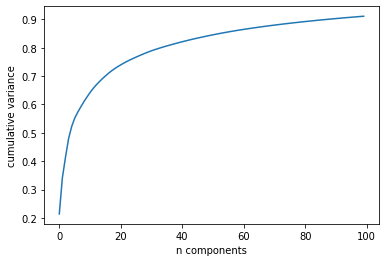

In [233]:
#learn the relationship between the images via PCA
#which will yield a sense of the variance

model = RandomizedPCA(100).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [234]:
#nearly 100 components are required to preserve 90% of the variance.
#apparently, sklearn Isomap can help with dimensionality reduction
#in such a case

from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

In [236]:
#the output is a 2D projection of all the input images.
#this function will output image
#thumbnails at the location of projections
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

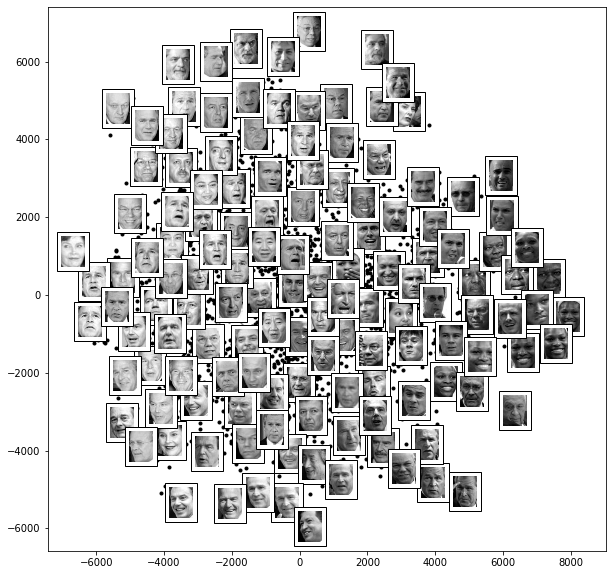

In [237]:
#now using the function to plot results
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])